# ANALYSE DE LA FRÉQUENTATION DES CANTINES SCOLAIRES

### 1. IMPORTATION DES LIBRAIRIES

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. CHARGEMENT DES DONNÉES

In [22]:
df = pd.read_csv('projet_cantines.csv')

# Conversion de la colonne date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

### 3. NETTOYAGE DES DONNÉES

In [23]:
# Copie du dataframe original
df_clean = df.copy()

# Gestion des valeurs manquantes dans gaspillage_pourcentagereel_moyen_annee
# Cette colonne semble avoir beaucoup de NaN, on la remplit par la médiane ou on la supprime
if df_clean['gaspillage_pourcentagereel_moyen_annee'].isnull().sum() > len(df_clean) * 0.5:
    print("\nSuppression de 'gaspillage_pourcentagereel_moyen_annee' (trop de valeurs manquantes)")
    df_clean = df_clean.drop('gaspillage_pourcentagereel_moyen_annee', axis=1)
else:
    median_gaspillage = df_clean['gaspillage_pourcentagereel_moyen_annee'].median()
    df_clean['gaspillage_pourcentagereel_moyen_annee'].fillna(median_gaspillage, inplace=True)
    print(f"\nValeurs manquantes de gaspillage remplies avec la médiane: {median_gaspillage}")

# Suppression des lignes avec des valeurs manquantes dans la variable cible 'reel'
df_clean = df_clean.dropna(subset=['reel'])
print(f"\nNombre de lignes après nettoyage: {len(df_clean)}")

# Identification des variables pertinentes pour l'analyse
# Variable cible: 'reel' (fréquentation réelle)
# Variables explicatives numériques
variables_numeriques = [
    'semaine', 'inc_grippe', 'inc_gastro', 'inc_varicelle',
    'gaspillage_volume', 'reel_std_annee', 'prevision', 'effectif'
]

# Variables binaires (0/1) qui peuvent influencer la fréquentation
variables_binaires = [
    'greves', 'ferie', 'veille_ferie', 'retour_ferie',
    'vacances', 'retour_vacances', 'veille_vacances',
    'fete_musulmane', 'ramadan', 'fete_chretienne', 'fete_juive',
    'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois'
]

# Variables catégorielles
variables_categorielles = ['jour', 'mois', 'annee_scolaire']

# Variable cible
variable_cible = 'reel'

print("\n" + "-"*80)
print("Variables sélectionnées pour l'analyse:")
print("-"*80)
print(f"Variable cible: {variable_cible}")
print(f"Variables numériques ({len(variables_numeriques)}): {variables_numeriques}")
print(f"Variables binaires ({len(variables_binaires)}): {variables_binaires}")
print(f"Variables catégorielles ({len(variables_categorielles)}): {variables_categorielles}")


Suppression de 'gaspillage_pourcentagereel_moyen_annee' (trop de valeurs manquantes)

Nombre de lignes après nettoyage: 1188

--------------------------------------------------------------------------------
Variables sélectionnées pour l'analyse:
--------------------------------------------------------------------------------
Variable cible: reel
Variables numériques (8): ['semaine', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'gaspillage_volume', 'reel_std_annee', 'prevision', 'effectif']
Variables binaires (18): ['greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne', 'fete_juive', 'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois']
Variables catégorielles (3): ['jour', 'mois', 'annee_scolaire']


### 4. ANALYSES UNIVARIÉES

           semaine    inc_grippe    inc_gastro  inc_varicelle  \
count  1188.000000   1188.000000   1188.000000    1188.000000   
mean     25.842593   2346.518519   4212.135522     706.073232   
std      15.877945   4778.634345   2627.853230    1067.539442   
min       1.000000      0.000000      0.000000       0.000000   
25%      12.000000      0.000000   2179.000000     103.000000   
50%      24.000000    371.000000   3458.000000     415.000000   
75%      41.000000   1910.000000   5858.000000     921.000000   
max      51.000000  35064.000000  13855.000000   10797.000000   

       gaspillage_volume  reel_std_annee     prevision      effectif  \
count        1188.000000     1188.000000   1188.000000   1188.000000   
mean          858.956229     1887.194872  13696.729798  18890.589226   
std           936.929244     1142.963043   2527.794888   1013.282762   
min         -1360.000000      786.915844      0.000000  17373.000000   
25%           501.000000      822.289561  13167.250000

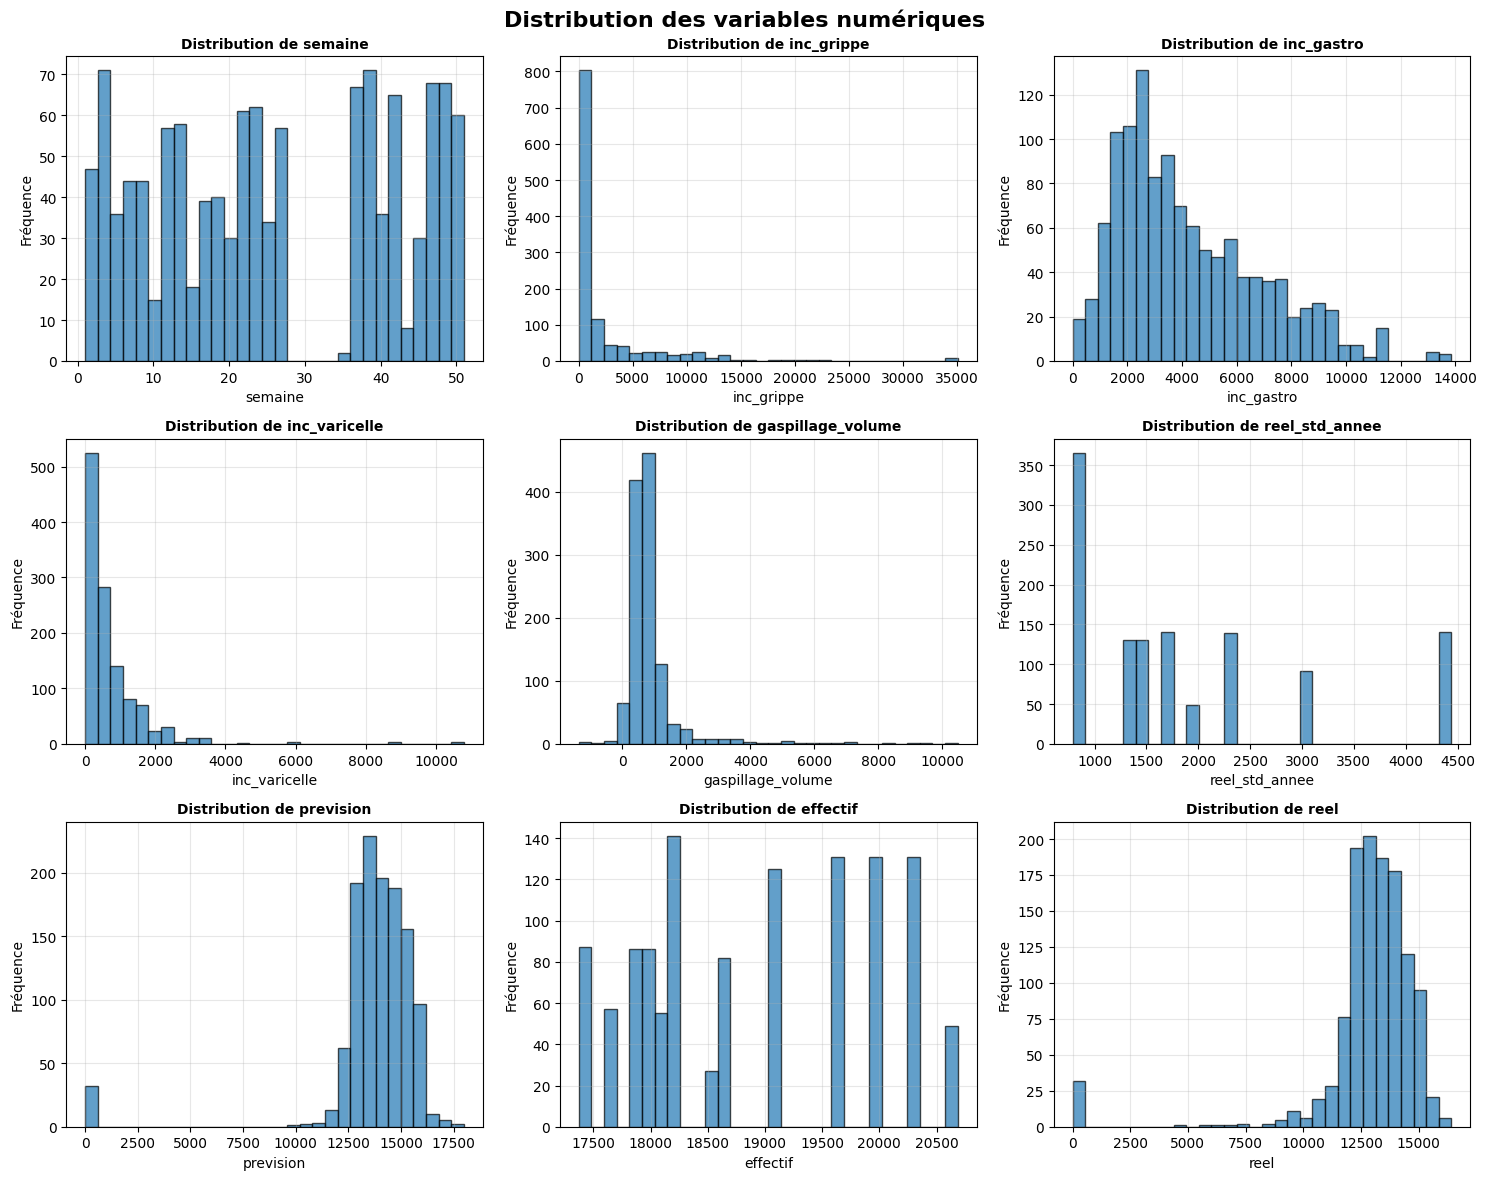

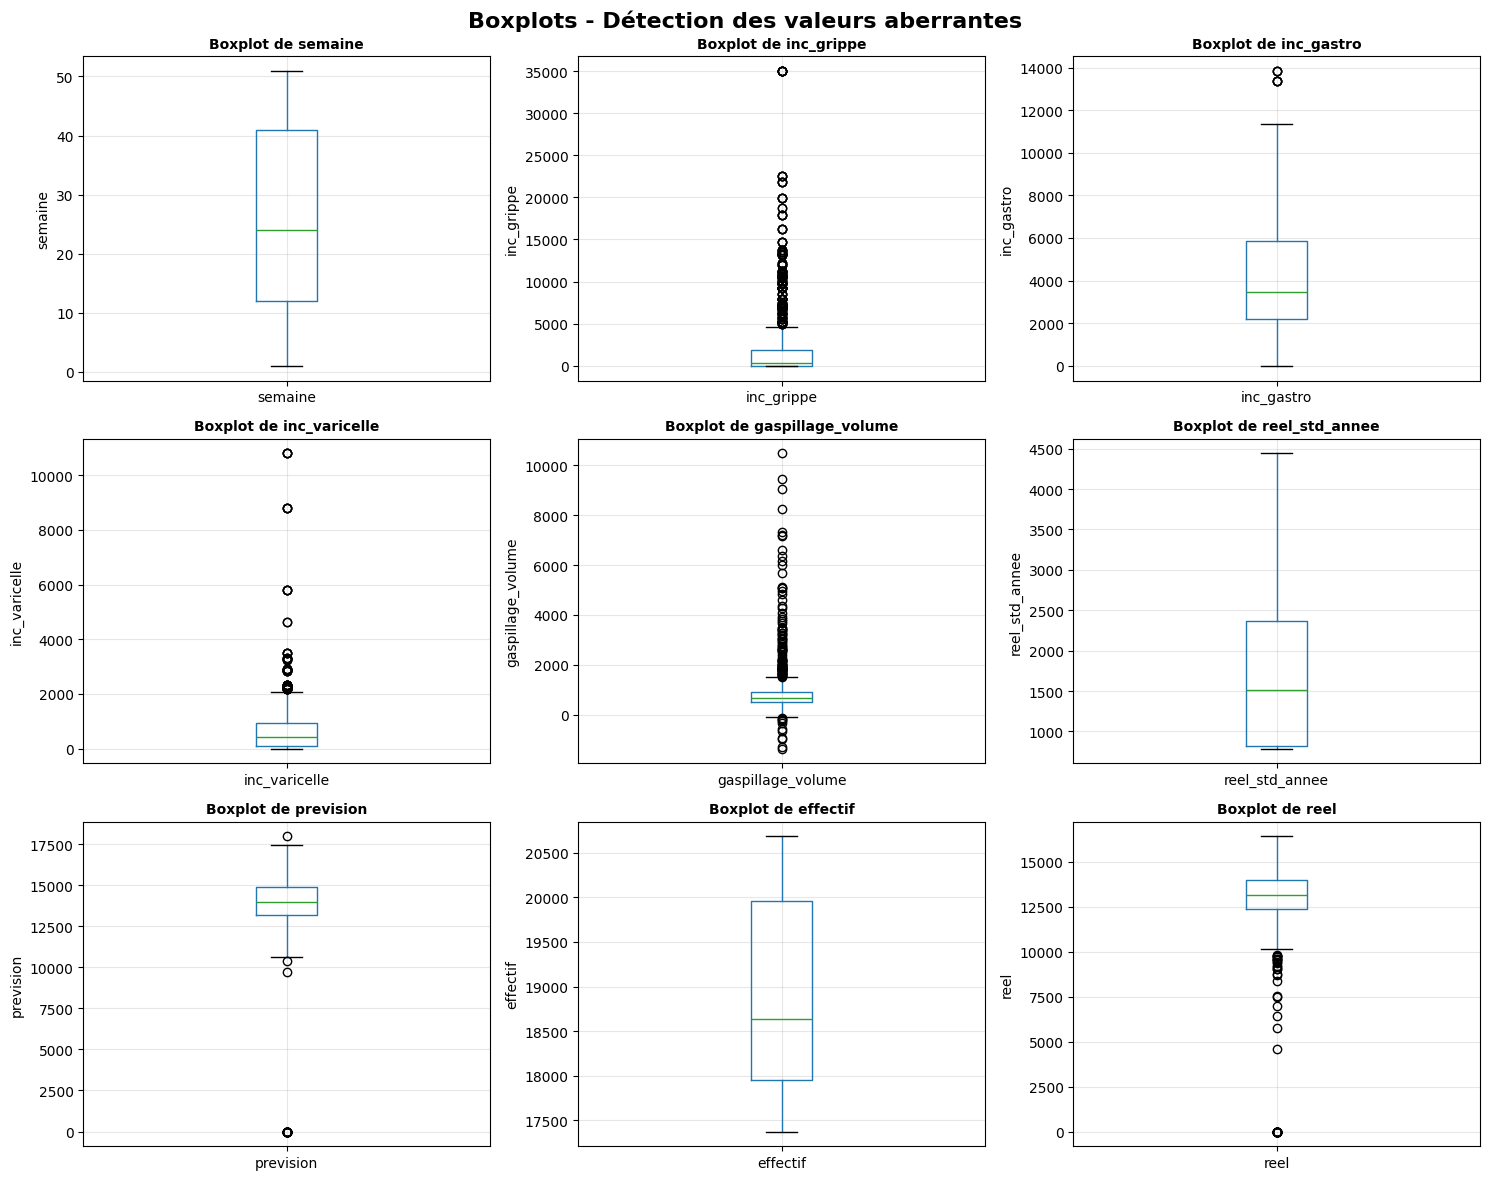

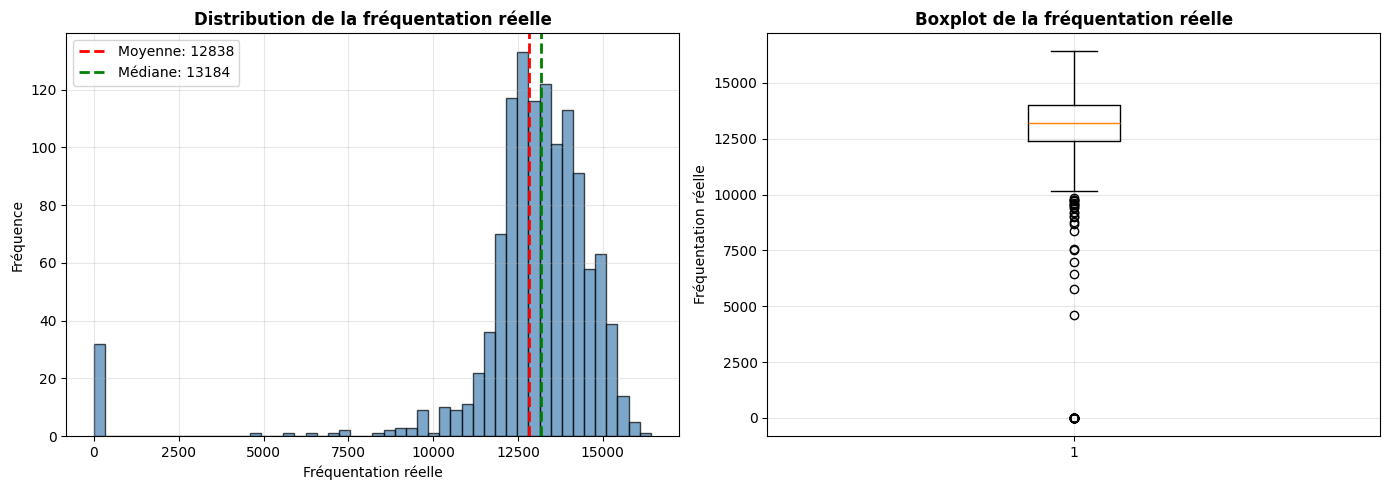

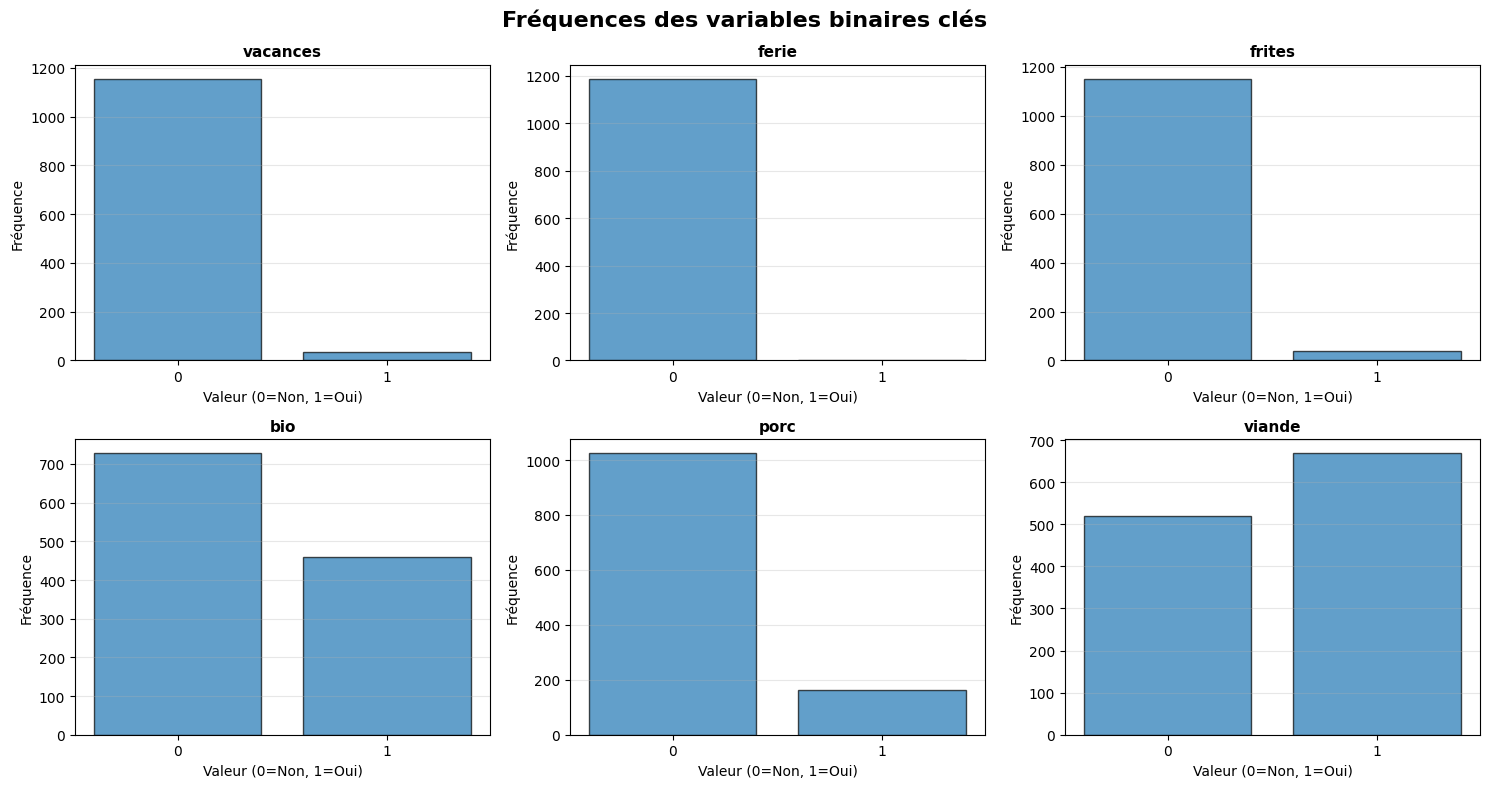

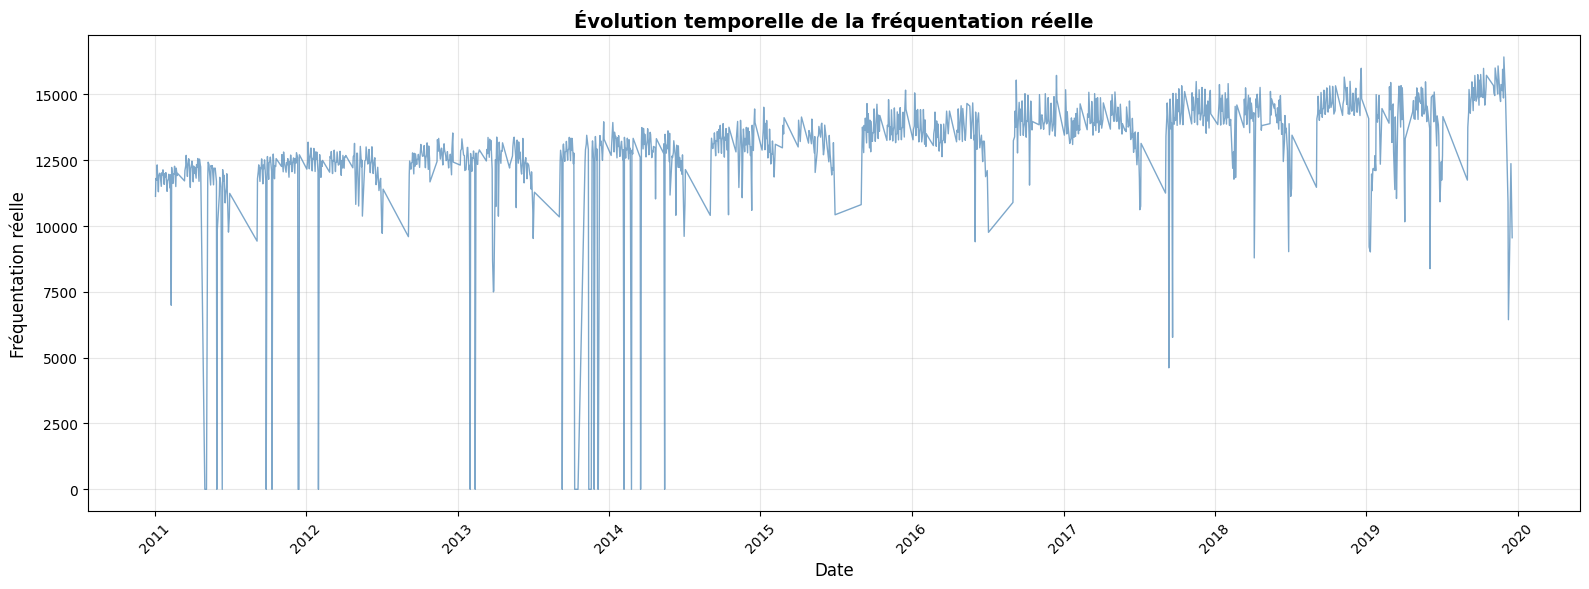

In [24]:
# Inclure la variable cible dans l'analyse
variables_num_analyse = variables_numeriques + [variable_cible]
stats_desc = df_clean[variables_num_analyse].describe()
print(stats_desc)

# Export des statistiques descriptives
stats_desc.to_csv('statistiques_descriptives.csv')
print("\nStatistiques exportées dans 'statistiques_descriptives.csv'")

# 4.2 Statistiques pour les variables binaires
print("4.2 FRÉQUENCES - Variables binaires")

freq_binaires = pd.DataFrame()
for var in variables_binaires:
    counts = df_clean[var].value_counts()
    percentages = df_clean[var].value_counts(normalize=True) * 100
    freq_binaires[f'{var}_count'] = counts
    freq_binaires[f'{var}_percent'] = percentages
    print(f"\n{var}:")
    print(f"  0: {counts.get(0, 0)} ({percentages.get(0, 0):.2f}%)")
    print(f"  1: {counts.get(1, 0)} ({percentages.get(1, 0):.2f}%)")

# 4.3 Statistiques pour les variables catégorielles
print("4.3 FRÉQUENCES - Variables catégorielles")

for var in variables_categorielles:
    print(f"\n{var}:")
    print(df_clean[var].value_counts().head(10))

# 4.4 Visualisations univariées
print("4.4 GÉNÉRATION DES VISUALISATIONS UNIVARIÉES")

# Histogrammes pour les variables numériques
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution des variables numériques', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, var in enumerate(variables_num_analyse):
    if idx < len(axes):
        df_clean[var].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution de {var}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Fréquence')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Boxplots pour détecter les outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Boxplots - Détection des valeurs aberrantes', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, var in enumerate(variables_num_analyse):
    if idx < len(axes):
        df_clean.boxplot(column=var, ax=axes[idx])
        axes[idx].set_title(f'Boxplot de {var}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel(var)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribution de la variable cible (fréquentation réelle)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme
axes[0].hist(df_clean[variable_cible], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title(f'Distribution de la fréquentation réelle', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fréquentation réelle')
axes[0].set_ylabel('Fréquence')
axes[0].axvline(df_clean[variable_cible].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Moyenne: {df_clean[variable_cible].mean():.0f}')
axes[0].axvline(df_clean[variable_cible].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Médiane: {df_clean[variable_cible].median():.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df_clean[variable_cible])
axes[1].set_title(f'Boxplot de la fréquentation réelle', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fréquentation réelle')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Bar charts pour les variables binaires les plus fréquentes
variables_binaires_top = ['vacances', 'ferie', 'frites', 'bio', 'porc', 'viande']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Fréquences des variables binaires clés', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, var in enumerate(variables_binaires_top):
    counts = df_clean[var].value_counts()
    axes[idx].bar(counts.index, counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{var}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Valeur (0=Non, 1=Oui)')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].set_xticks([0, 1])
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Évolution temporelle de la fréquentation
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df_clean['date'], df_clean['reel'], linewidth=1, alpha=0.7, color='steelblue')
ax.set_title('Évolution temporelle de la fréquentation réelle', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Fréquentation réelle', fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. ANALYSES BIVARIÉES


Matrice de corrélation calculée
Matrice exportée dans 'matrice_correlation_pearson.csv'


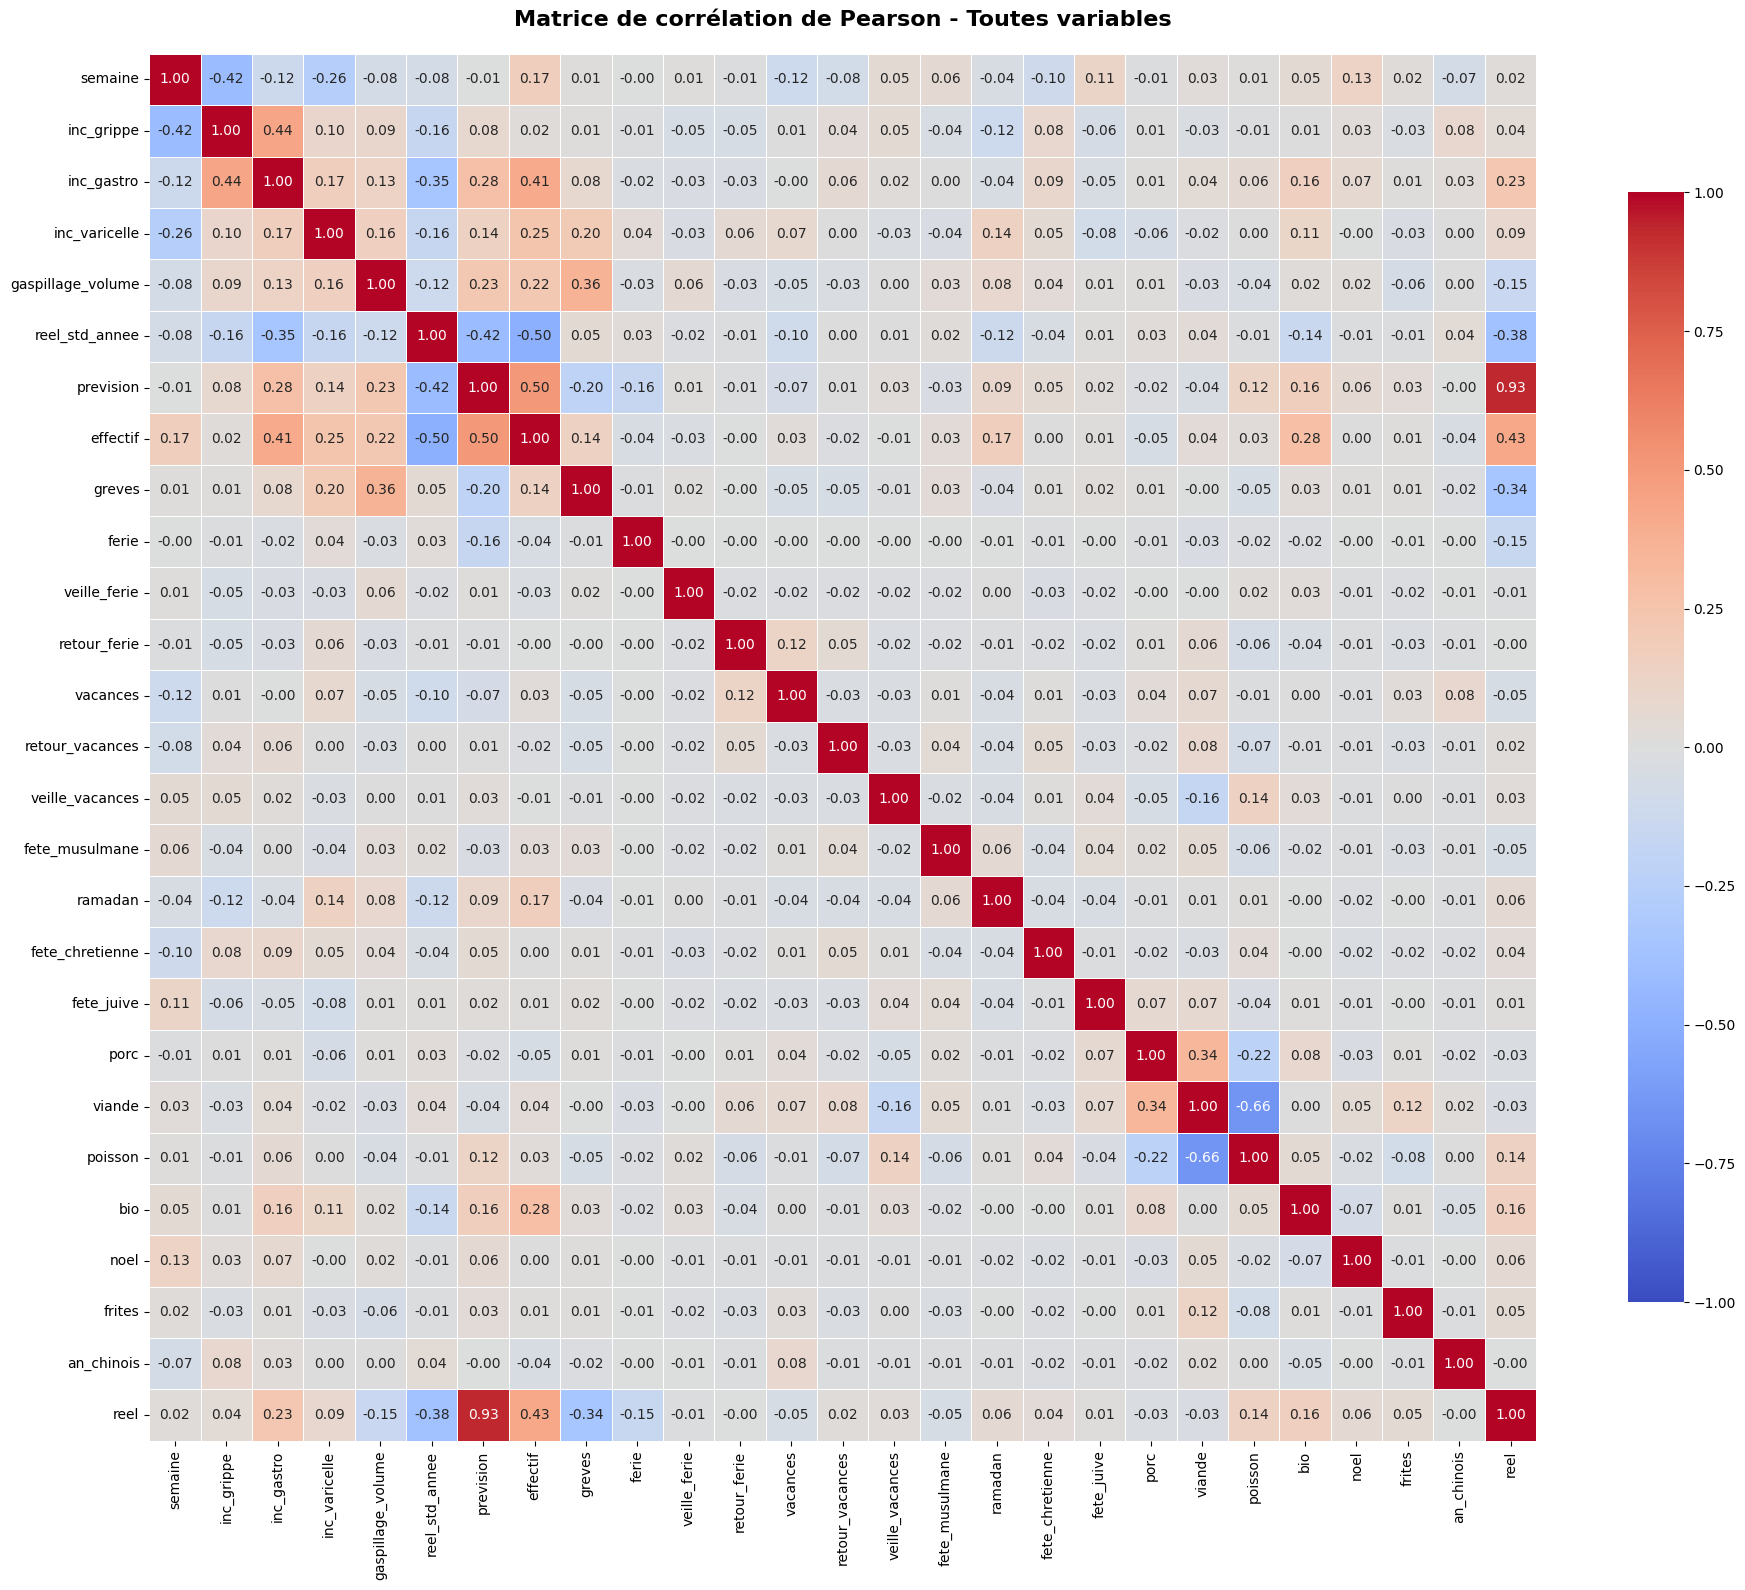

5.2 CORRÉLATIONS AVEC LA VARIABLE CIBLE (reel)

Corrélations avec la fréquentation réelle (reel):
reel                 1.000000
prevision            0.930382
effectif             0.425556
inc_gastro           0.231421
bio                  0.161319
poisson              0.141565
inc_varicelle        0.085723
ramadan              0.057895
noel                 0.057323
frites               0.053817
inc_grippe           0.043667
fete_chretienne      0.038594
veille_vacances      0.025573
semaine              0.022877
retour_vacances      0.016014
fete_juive           0.012529
retour_ferie        -0.001082
an_chinois          -0.003287
veille_ferie        -0.012796
porc                -0.025776
viande              -0.032291
vacances            -0.047521
fete_musulmane      -0.048342
gaspillage_volume   -0.147596
ferie               -0.149703
greves              -0.344533
reel_std_annee      -0.380336
Name: reel, dtype: float64


Corrélations significatives (|r| > 0.3):
prevision         0.93

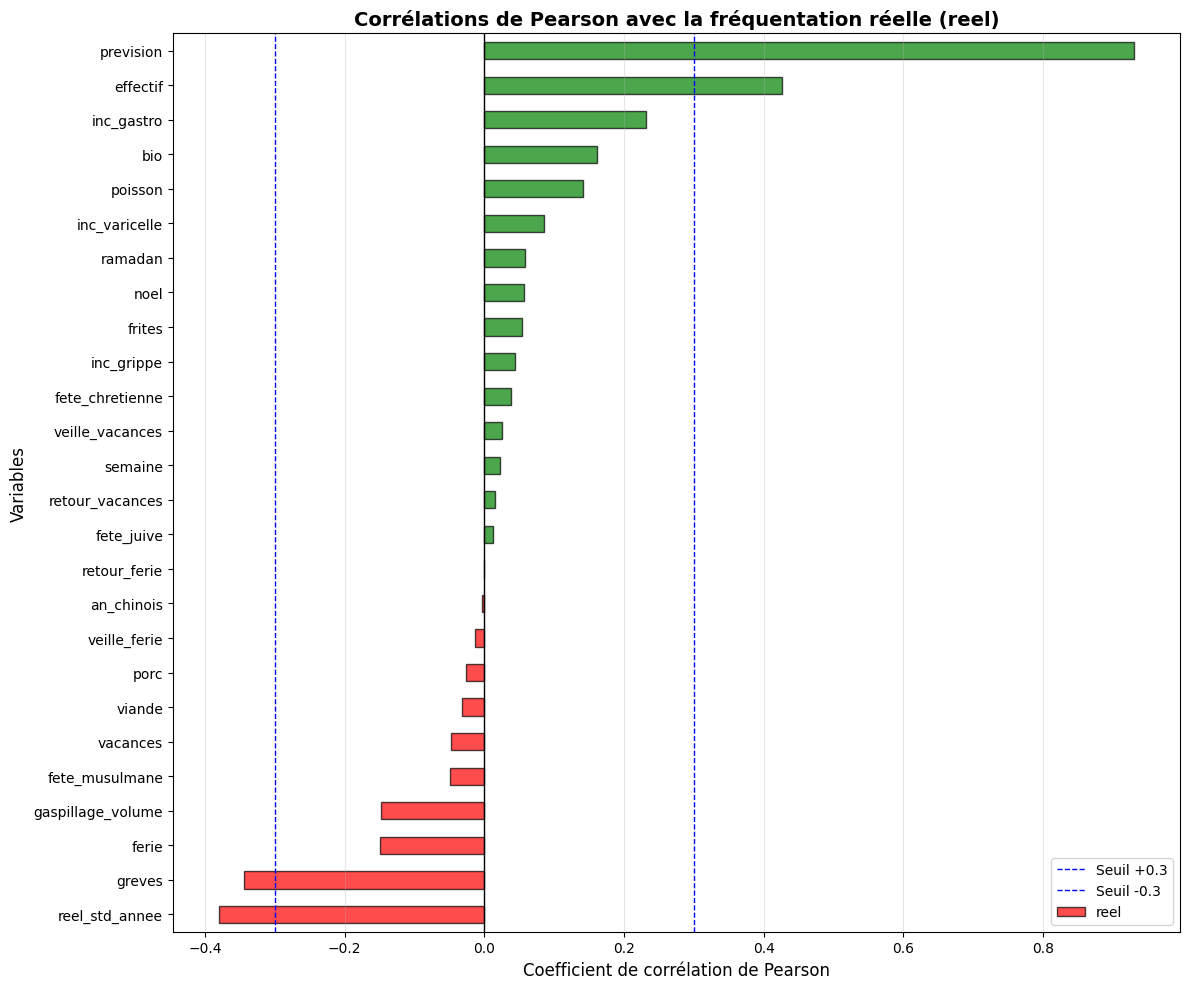

5.3 SCATTER PLOTS - Corrélations fortes


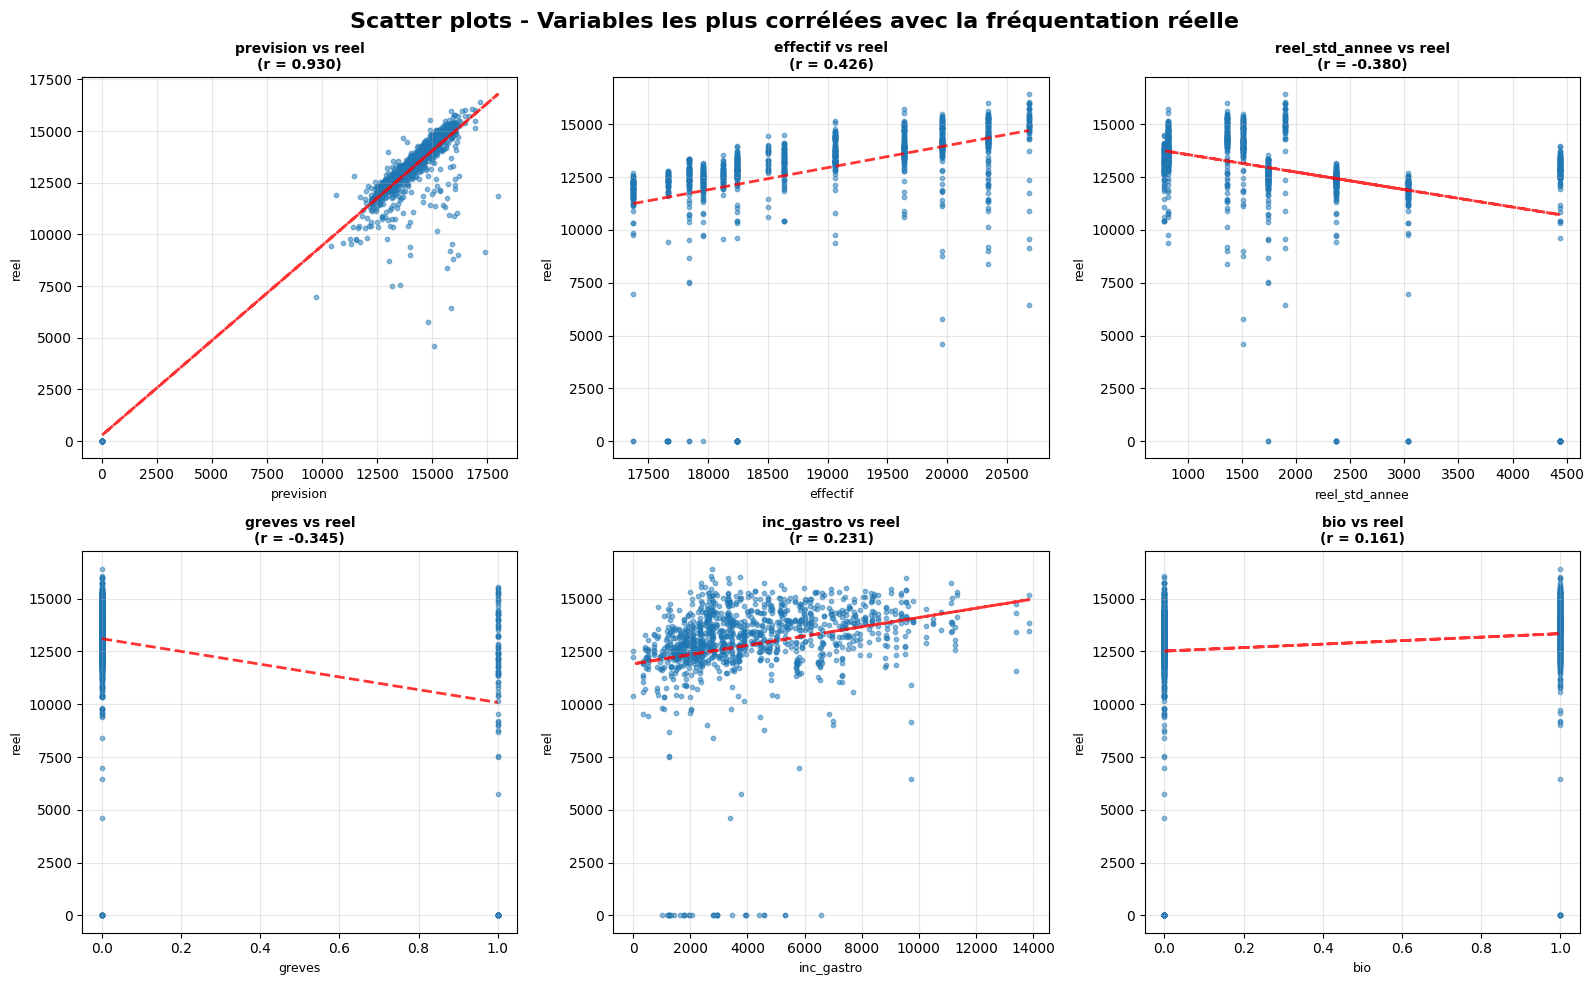

5.4 ANALYSE PAR JOUR DE LA SEMAINE

Fréquentation moyenne par jour de la semaine:
                  mean   median          std  count
jour                                               
Jeudi     12714.837370  13082.0  2607.084775    289
Lundi     12608.460481  12777.0  1944.683978    291
Mardi     12627.936455  13223.0  2923.827952    299
Mercredi   9589.888889  10699.0  3647.768408      9
Vendredi  13485.210000  13683.0  2162.609470    300


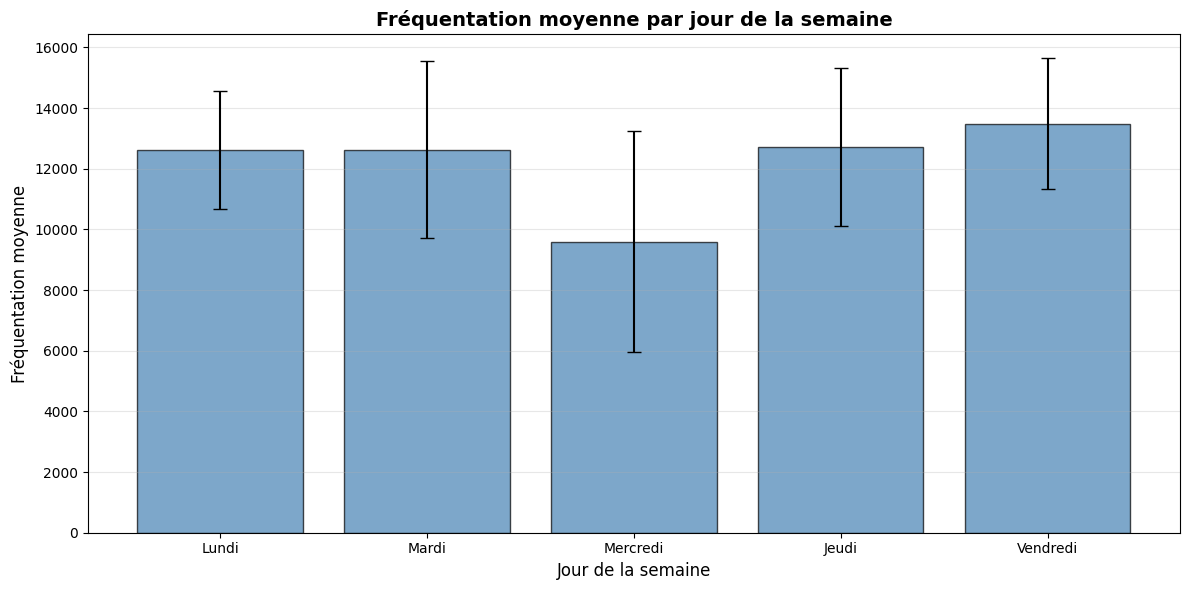

Graphique par jour sauvegardé: 'frequentation_par_jour.png'
5.5 ANALYSE PAR MOIS

Fréquentation moyenne par mois:
                   mean   median          std  count
mois                                                
Avril      13132.445652  13173.5  1135.859034     92
Decembre   12922.917526  13584.0  3034.543505     97
Fevrier    12528.242105  12817.0  2522.683579     95
Janvier    12881.467626  13035.0  1877.275363    139
Juillet    11371.120000  11284.0  1227.562433     25
Juin       12528.385185  12597.0  1649.752008    135
Mai        12640.830508  13297.0  3113.619586    118
Mars       13094.908257  13220.0  1845.543674    109
Novembre   13165.413534  13747.0  3058.362476    133
Octobre    12676.282828  13424.0  3682.954523     99
Septembre  13070.787671  13332.0  2174.901076    146


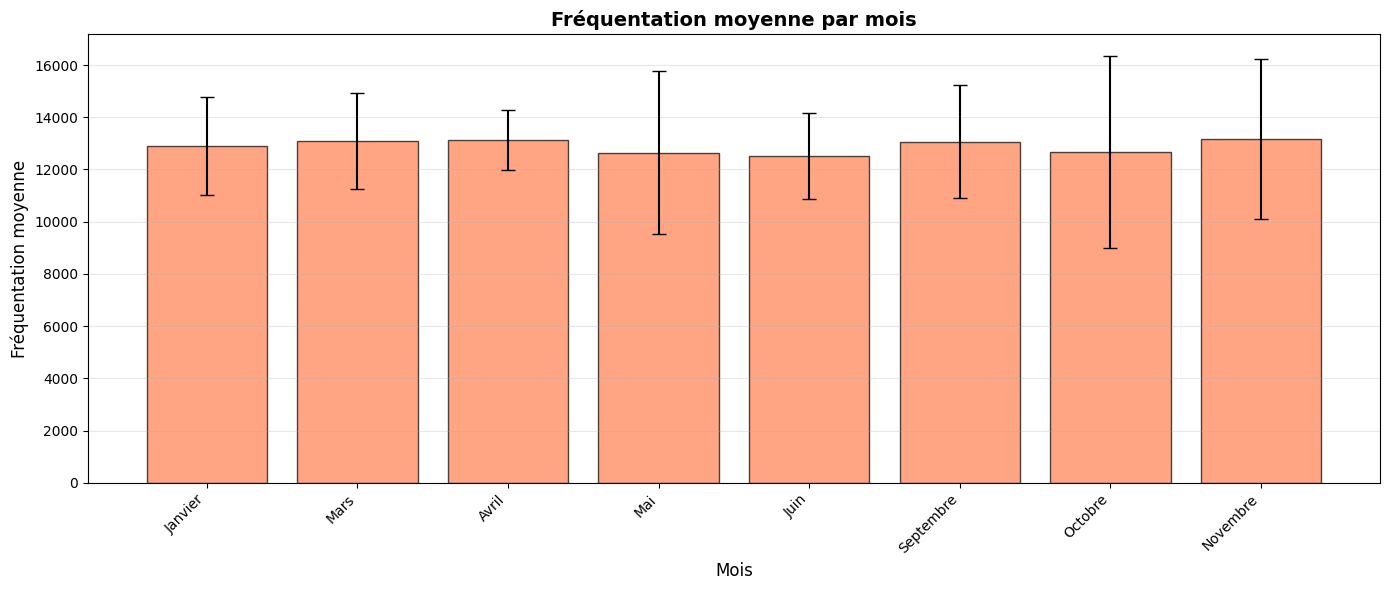

5.6 IMPACT DES VARIABLES BINAIRES SUR LA FRÉQUENTATION

Fréquentation moyenne selon les variables binaires:
greves                      0             1
greves           13104.795014  10083.638095
ferie            12848.588880      0.000000
veille_ferie     12841.494881  12565.187500
retour_ferie     12838.168530  12819.400000
vacances         12857.767100  12138.000000
retour_vacances  12831.141869  13077.343750
veille_vacances  12827.354365  13226.645161
fete_musulmane   12856.123170  12048.740741
ramadan          12802.823529  13431.924242
fete_chretienne  12810.105743  13171.307692
fete_juive       12832.502165  13022.272727
porc             12863.358049  12676.889571
viande           12929.026975  12766.980568
poisson          12634.336700  13448.084175
bio              12518.594780  13342.908696
noel             12826.025424  14570.625000
frites           12813.423478  13574.684211
an_chinois       12838.249155  12697.000000


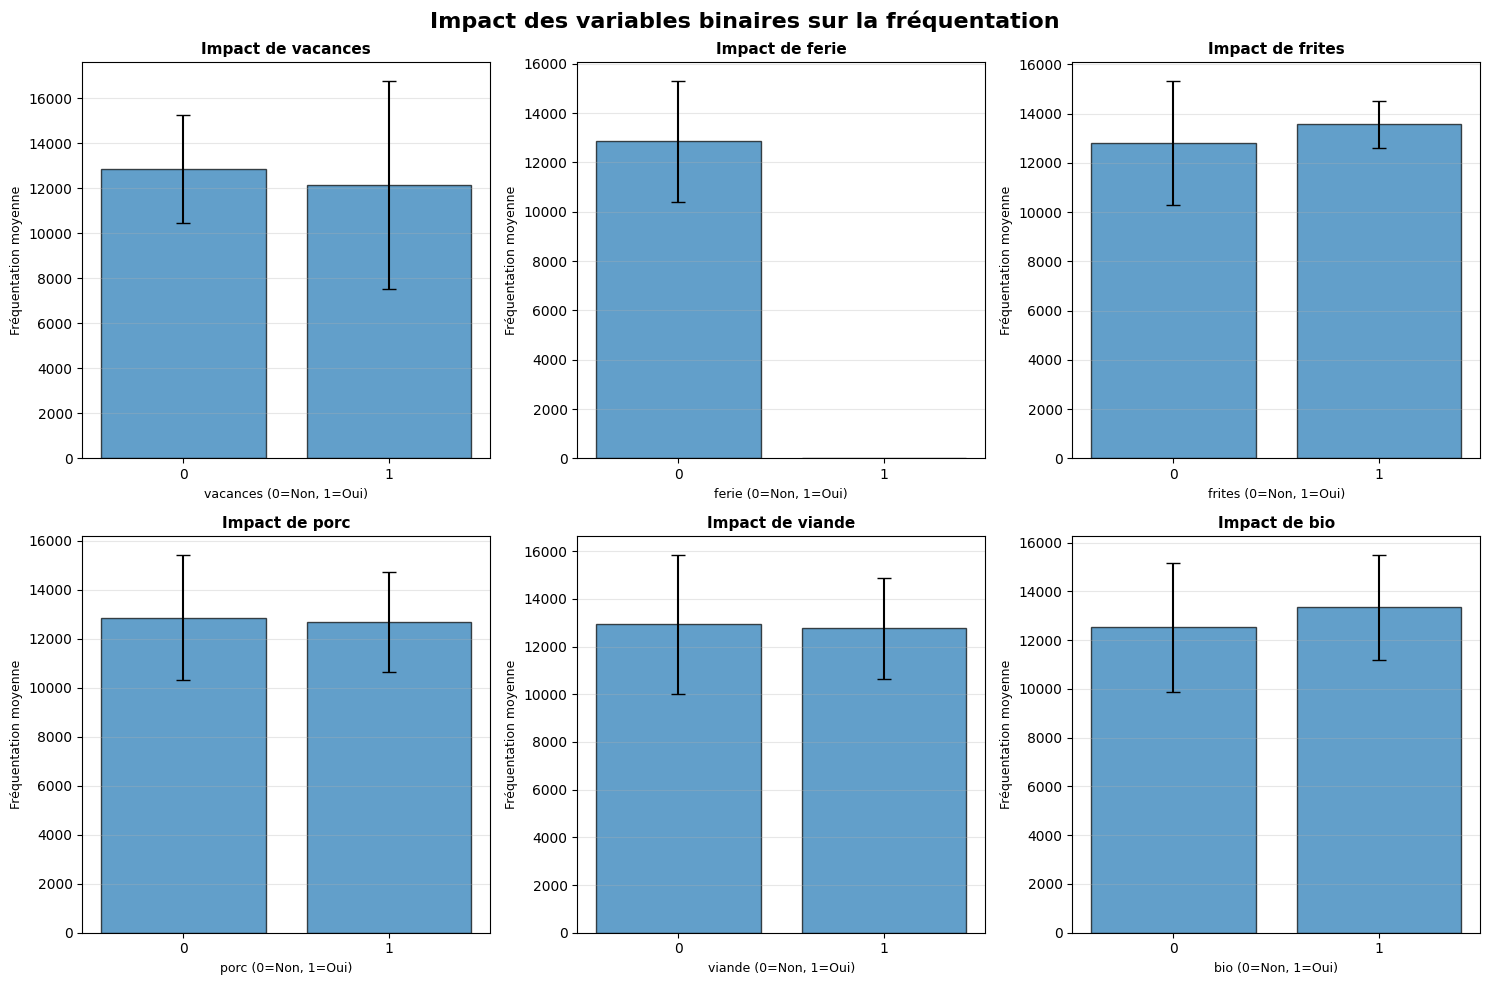

In [25]:
# Créer un dataframe avec toutes les variables numériques et binaires
variables_correlation = variables_numeriques + variables_binaires + [variable_cible]
df_corr = df_clean[variables_correlation]

# Calcul de la matrice de corrélation
matrice_correlation = df_corr.corr(method='pearson')
print("\nMatrice de corrélation calculée")

# Export de la matrice
matrice_correlation.to_csv('matrice_correlation_pearson.csv')
print("Matrice exportée dans 'matrice_correlation_pearson.csv'")

# Visualisation de la matrice de corrélation complète
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(matrice_correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('Matrice de corrélation de Pearson - Toutes variables', 
             fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 5.2 Corrélations avec la variable cible (reel)
print("5.2 CORRÉLATIONS AVEC LA VARIABLE CIBLE (reel)")

# Extraire les corrélations avec 'reel'
correlations_cible = matrice_correlation[variable_cible].sort_values(ascending=False)
print("\nCorrélations avec la fréquentation réelle (reel):")
print(correlations_cible)

# Identifier les corrélations significatives (|r| > 0.3)
seuil = 0.3
correlations_significatives = correlations_cible[
    (correlations_cible.abs() > seuil) & (correlations_cible.index != variable_cible)
]
print(f"\n\nCorrélations significatives (|r| > {seuil}):")
print(correlations_significatives)

# Export des corrélations
correlations_cible.to_csv('correlations_avec_reel.csv', header=['Corrélation'])
print("\nCorrélations exportées dans 'correlations_avec_reel.csv'")

# Visualisation des corrélations avec la variable cible
fig, ax = plt.subplots(figsize=(12, 10))
correlations_plot = correlations_cible.drop(variable_cible).sort_values()
colors = ['red' if x < 0 else 'green' for x in correlations_plot.values]
correlations_plot.plot(kind='barh', ax=ax, color=colors, edgecolor='black', alpha=0.7)
ax.set_title('Corrélations de Pearson avec la fréquentation réelle (reel)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Coefficient de corrélation de Pearson', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
ax.axvline(x=0, color='black', linewidth=1)
ax.axvline(x=seuil, color='blue', linestyle='--', linewidth=1, label=f'Seuil +{seuil}')
ax.axvline(x=-seuil, color='blue', linestyle='--', linewidth=1, label=f'Seuil -{seuil}')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 5.3 Scatter plots pour les corrélations les plus fortes
print("5.3 SCATTER PLOTS - Corrélations fortes")

# Sélectionner les 6 variables les plus corrélées (hors variable cible)
top_correlations = correlations_cible.drop(variable_cible).abs().nlargest(6)
variables_top = top_correlations.index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Scatter plots - Variables les plus corrélées avec la fréquentation réelle', 
             fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, var in enumerate(variables_top):
    if idx < len(axes):
        axes[idx].scatter(df_clean[var], df_clean[variable_cible], alpha=0.5, s=10)
        axes[idx].set_title(f'{var} vs {variable_cible}\n(r = {correlations_cible[var]:.3f})', 
                           fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(var, fontsize=9)
        axes[idx].set_ylabel(variable_cible, fontsize=9)
        axes[idx].grid(True, alpha=0.3)
        
        # Ajouter une ligne de régression
        z = np.polyfit(df_clean[var], df_clean[variable_cible], 1)
        p = np.poly1d(z)
        axes[idx].plot(df_clean[var], p(df_clean[var]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# 5.4 Analyse par jour de la semaine
print("5.4 ANALYSE PAR JOUR DE LA SEMAINE")

freq_par_jour = df_clean.groupby('jour')[variable_cible].agg(['mean', 'median', 'std', 'count'])
print("\nFréquentation moyenne par jour de la semaine:")
print(freq_par_jour)

# Ordre des jours
ordre_jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi']
freq_par_jour = freq_par_jour.reindex(ordre_jours)

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(freq_par_jour.index, freq_par_jour['mean'], yerr=freq_par_jour['std'], 
       capsize=5, edgecolor='black', alpha=0.7, color='steelblue')
ax.set_title('Fréquentation moyenne par jour de la semaine', fontsize=14, fontweight='bold')
ax.set_xlabel('Jour de la semaine', fontsize=12)
ax.set_ylabel('Fréquentation moyenne', fontsize=12)
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 5.5 Analyse par mois
print("5.5 ANALYSE PAR MOIS")

freq_par_mois = df_clean.groupby('mois')[variable_cible].agg(['mean', 'median', 'std', 'count'])
print("\nFréquentation moyenne par mois:")
print(freq_par_mois)

# Ordre des mois
ordre_mois = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
              'Septembre', 'Octobre', 'Novembre', 'Décembre']
freq_par_mois = freq_par_mois.reindex([m for m in ordre_mois if m in freq_par_mois.index])

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(freq_par_mois.index, freq_par_mois['mean'], yerr=freq_par_mois['std'], 
       capsize=5, edgecolor='black', alpha=0.7, color='coral')
ax.set_title('Fréquentation moyenne par mois', fontsize=14, fontweight='bold')
ax.set_xlabel('Mois', fontsize=12)
ax.set_ylabel('Fréquentation moyenne', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 5.6 Impact des variables binaires sur la fréquentation
print("5.6 IMPACT DES VARIABLES BINAIRES SUR LA FRÉQUENTATION")

impact_binaires = pd.DataFrame()
for var in variables_binaires:
    moyennes = df_clean.groupby(var)[variable_cible].mean()
    impact_binaires[var] = moyennes

print("\nFréquentation moyenne selon les variables binaires:")
print(impact_binaires.T)

# Visualisation de l'impact des principales variables binaires
variables_impact = ['vacances', 'ferie', 'frites', 'porc', 'viande', 'bio']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Impact des variables binaires sur la fréquentation', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, var in enumerate(variables_impact):
    if idx < len(axes):
        moyennes = df_clean.groupby(var)[variable_cible].mean()
        stds = df_clean.groupby(var)[variable_cible].std()
        axes[idx].bar(moyennes.index, moyennes.values, yerr=stds.values, 
                     capsize=5, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Impact de {var}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(f'{var} (0=Non, 1=Oui)', fontsize=9)
        axes[idx].set_ylabel('Fréquentation moyenne', fontsize=9)
        axes[idx].set_xticks([0, 1])
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 6. SYNTHÈSE DES RÉSULTATS

In [26]:
print("SYNTHÈSE DES RÉSULTATS")

print("\n VARIABLE CIBLE: Fréquentation réelle (reel)")
print(f"   - Moyenne: {df_clean[variable_cible].mean():.2f}")
print(f"   - Médiane: {df_clean[variable_cible].median():.2f}")
print(f"   - Écart-type: {df_clean[variable_cible].std():.2f}")
print(f"   - Min: {df_clean[variable_cible].min():.2f}")
print(f"   - Max: {df_clean[variable_cible].max():.2f}")

print("\n VARIABLES LES PLUS CORRÉLÉES AVEC LA FRÉQUENTATION:")
top_5_corr = correlations_cible.drop(variable_cible).abs().nlargest(5)
for i, (var, corr_val) in enumerate(top_5_corr.items(), 1):
    corr_signe = correlations_cible[var]
    print(f"   {i}. {var}: r = {corr_signe:.3f}")

print("\n FACTEURS RÉDUISANT LA FRÉQUENTATION (corrélations négatives):")
correlations_negatives = correlations_cible[correlations_cible < -0.1].drop(variable_cible, errors='ignore').sort_values()
if len(correlations_negatives) > 0:
    for var, corr_val in correlations_negatives.items():
        print(f"   - {var}: r = {corr_val:.3f}")
else:
    print("   Aucune corrélation négative significative détectée")

print("\n FACTEURS AUGMENTANT LA FRÉQUENTATION (corrélations positives):")
correlations_positives = correlations_cible[correlations_cible > 0.1].drop(variable_cible, errors='ignore').sort_values(ascending=False)
if len(correlations_positives) > 0:
    for var, corr_val in correlations_positives.items():
        print(f"   - {var}: r = {corr_val:.3f}")
else:
    print("   Aucune corrélation positive significative détectée")

SYNTHÈSE DES RÉSULTATS

 VARIABLE CIBLE: Fréquentation réelle (reel)
   - Moyenne: 12837.77
   - Médiane: 13184.00
   - Écart-type: 2490.10
   - Min: 0.00
   - Max: 16423.00

 VARIABLES LES PLUS CORRÉLÉES AVEC LA FRÉQUENTATION:
   1. prevision: r = 0.930
   2. effectif: r = 0.426
   3. reel_std_annee: r = -0.380
   4. greves: r = -0.345
   5. inc_gastro: r = 0.231

 FACTEURS RÉDUISANT LA FRÉQUENTATION (corrélations négatives):
   - reel_std_annee: r = -0.380
   - greves: r = -0.345
   - ferie: r = -0.150
   - gaspillage_volume: r = -0.148

 FACTEURS AUGMENTANT LA FRÉQUENTATION (corrélations positives):
   - prevision: r = 0.930
   - effectif: r = 0.426
   - inc_gastro: r = 0.231
   - bio: r = 0.161
   - poisson: r = 0.142
